In [1]:
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import re    # For handling regular expressions.

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

import pickle   # for saving and loading models.

In [2]:
df = pd.read_csv("UpdatedResumeDataSet.csv")
df.head(3)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."


In [3]:
# df["Resume"][0]

In [4]:
category_counts = df["Category"].value_counts()

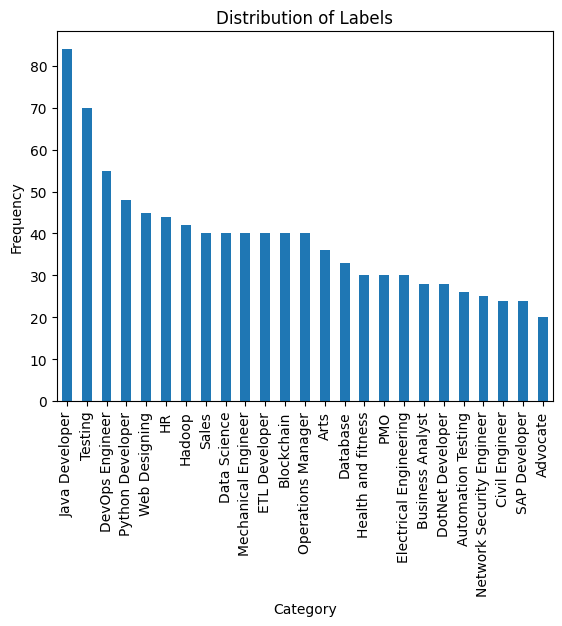

In [5]:
df['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Distribution of Labels')
plt.show()

# Data Cleaning

In [6]:
def preprocess(text):
    
    # Lowercase the text
    text = text.lower()
    
    # Remove newline (\n), tab (\t), and carriage return (\r) characters
    text = re.sub(r'[\n\t\r]', ' ', text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove mentions (@username) and hashtags (#hashtag)
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Handle encoding issues (e.g., â\x80¢)
    text = text.encode('ascii', 'ignore').decode('ascii')
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Return the processed text as a single string
    return ' '.join(tokens)

In [7]:
 df['Processed_Resume'] = df['Resume'].apply(preprocess)

In [8]:
le = LabelEncoder()
le.fit(df["Category"])
df["Category"] = le.transform(df["Category"])
df.head(3)

,Category,Resume,Processed_Resume
0,6,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may may uitrgpv data scientis...
2,6,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...


In [9]:
for index, category in enumerate(le.classes_):
    print(f"{category} -> {index}")

Advocate -> 0
Arts -> 1
Automation Testing -> 2
Blockchain -> 3
Business Analyst -> 4
Civil Engineer -> 5
Data Science -> 6
Database -> 7
DevOps Engineer -> 8
DotNet Developer -> 9
ETL Developer -> 10
Electrical Engineering -> 11
HR -> 12
Hadoop -> 13
Health and fitness -> 14
Java Developer -> 15
Mechanical Engineer -> 16
Network Security Engineer -> 17
Operations Manager -> 18
PMO -> 19
Python Developer -> 20
SAP Developer -> 21
Sales -> 22
Testing -> 23
Web Designing -> 24


# Vectorizer 

In [10]:
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(df['Processed_Resume'])
vectorized_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
vectorized_df.head(4)

,ability,access,account,across,action,activity,admin,administration,administrator,agile,...,window,within,word,work,worked,working,workshop,writing,xp,year
0,0.0,0.0,0.0,0.12615,0.047754,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.233257,0.0,0.030090,0.000000,0.0,0.0,0.0,0.024349
1,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.076893,0.000000,0.0,0.0,0.0,0.373329
2,0.0,0.0,0.0,0.00000,0.000000,0.057328,0.0,0.0,0.0,0.0,...,0.055158,0.0,0.000000,0.0,0.000000,0.043688,0.0,0.0,0.0,0.349940
3,0.0,0.0,0.0,0.01884,0.000000,0.057189,0.0,0.0,0.0,0.0,...,0.013756,0.0,0.041803,0.0,0.000000,0.000000,0.0,0.0,0.0,0.065455


In [11]:
X = vectorized_df
y = df['Category']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
knn.score(X_test,y_test)*100  ,  knn.score(X_train,y_train)*100

(96.37305699481865, 97.39921976592979)

In [15]:
# Save the trained KNN model

with open('knn_model.pkl', 'wb') as model_file:
    pickle.dump(knn, model_file)

    
# Save the TF-IDF Vectorizer

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)
    
    
# Save the LabelEncoder

with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(le, le_file)

In [16]:
# Load the trained KNN model

with open('knn_model.pkl', 'rb') as model_file:
    knn_loaded = pickle.load(model_file)

    
# Load the TF-IDF Vectorizer

with open('vectorizer.pkl', 'rb') as vectorizer_file:
    vectorizer_loaded = pickle.load(vectorizer_file)
    

# Load the LabelEncoder

with open('label_encoder.pkl', 'rb') as le_file:
    le_loaded = pickle.load(le_file)


In [17]:
new_resume = ["Experience in java and python"]

processed_resume = preprocess(new_resume[0])

vectorized_resume = vectorizer_loaded.transform([processed_resume])

vectorized_resume = pd.DataFrame(vectorized_resume.toarray(), columns=vectorizer_loaded.get_feature_names_out())

predicted_label = knn_loaded.predict(vectorized_resume)

predicted_category = le_loaded.inverse_transform(predicted_label)

print("Predicted Category:", predicted_category[0])


Predicted Category: Python Developer
